In [4]:
import os
import json

os.chdir('../../')

In [125]:
import torch
from rdkit import Chem
import numpy as np
from itertools import chain
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw

In [6]:
pharmaco_res_path = 'misc/evaluations/archive/20240117_alpha_default_evaluated.json'
with open(pharmaco_res_path) as f:
    pharmaco_res = json.load(f)

In [12]:
decomp_res_path = 'misc/evaluations/decompdiff_agg_data_evaluated.json'
with open(decomp_res_path) as f:
    decomp_res = json.load(f)

In [50]:
crossdock = torch.load(
    "dataset/archived/crossdock_docking_scores/all_crossdock_100k.pt"
)
crossdock_smiles = list(set([v[1] for v in crossdock]))
crossdock_mols = [Chem.MolFromSmiles(s) for s in crossdock_smiles]
crossdock_fps = [Chem.RDKFingerprint(m) for m in crossdock_mols]

def get_most_similar_compound(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = Chem.RDKFingerprint(mol)
    s = DataStructs.BulkTanimotoSimilarity(fp, crossdock_fps)
    
    most_sim_i = s.index(max(s))
    return crossdock_smiles[most_sim_i]

In [21]:
all_decomp_nov = list(chain.from_iterable([v['novelty'] for v in decomp_res.values()]))

In [53]:
decomp_res.keys()

dict_keys(['4rn0_B', '3daf_A', '2v3r_A', '4pxz_A', '1fmc_B', '3ej8_A', '5tjn_A', '1d7j_A', '4qlk_A', '3pnm_A', '3jyh_A', '4rv4_A', '3g51_A', '2z3h_A', '5ngz_A', '1h0i_A', '4p6p_A', '2hcj_B', '5q0k_A', '5bur_A', '4q8b_B', '2e6d_A', '1phk_A', '14gs_A', '5aeh_A', '4xli_B', '4gvd_A', '3u9f_C', '4aaw_A', '4iiy_A', '1gg5_A', '2zen_A', '1jn2_P', '1r1h_A', '5mgl_A', '4rlu_A', '2rma_A', '1l3l_A', '1k9t_A', '4aua_A', '4zfa_A', '2jjg_A', '2f2c_B', '3v4t_A', '2gns_A', '4tos_A', '1afs_A', '3tym_A', '5mma_A', '2pc8_A', '4g3d_B', '4yhj_A', '3gs6_A', '3li4_A', '5i0b_A', '3kc1_A', '4iwq_A', '4kcq_A', '3l3n_A', '5w2g_A', '3u5y_B', '5d7n_D', '5liu_X', '4bel_A', '4d7o_A', '4u5s_A', '1h36_A', '1ai4_A', '4azf_A', '5l1v_A', '2azy_A', '1umd_B', '1djy_A', '4tqr_A', '1e8h_A', '2cy0_A', '3w83_B', '4f1m_A', '3chc_B', '4z2g_A', '3dzh_A', '4keu_A', '1dxo_C', '5b08_A', '3pdh_A', '2pqw_A', '1a2g_A', '4ja8_B', '3hy9_B', '4lfu_A', '2e24_A', '1rs9_A', '4m7t_A', '3o96_A', '3nfb_A', '3af2_A', '3b6h_A', '4h3c_A', '2rhy_A',

In [187]:
# Good ones '3daf_A' 
# pocket =  '3daf_A'

In [239]:
# pocket =  '4rv4_A'
# idx_sort = [i for i in np.argsort(decomp_res[pocket]['novelty']) if decomp_res[pocket]['docking_scores'][i] > -7 and decomp_res[pocket]['novelty'][i] > 0.05]

In [277]:
def try_pocket(pocket, save=False):
    #   and 
    print(pocket)
    #  decomp_res[pocket]['docking_scores'][i] > -8 and
    idx_sort = [i for i in np.argsort(decomp_res[pocket]['novelty']) if decomp_res[pocket]['novelty'][i] > 0.05]
    if len(idx_sort) == 0:
        return None
    i = 0
    
    print(f"novelty: {decomp_res[pocket]['novelty'][idx_sort[i]]}")
    print(f"qed: {decomp_res[pocket]['qeds'][idx_sort[i]]}")
    print(f"sa: {decomp_res[pocket]['sas'][idx_sort[i]]}")
    print(f"ds: {decomp_res[pocket]['docking_scores'][idx_sort[i]]}")

    decomp_diffmol = Chem.MolFromSmiles(decomp_res[pocket]['smiles'][idx_sort[i]])

    img = Draw.MolToImage(decomp_diffmol, size=(200, 133), thickness=0)
    if save:
        img.save('figures/example_mols/decomp_molecule1.png')
    
    smi = get_most_similar_compound(decomp_res[pocket]['smiles'][idx_sort[i]])
    sim_mol = Chem.MolFromSmiles(smi)

    img2 = Draw.MolToImage(sim_mol, size=(200, 133), thickness=0)
    if save:
        img2.save('figures/example_mols/decomp_similar_molecule1.png')
    
    return Draw.MolsToGridImage([decomp_diffmol, sim_mol], molsPerRow=2, subImgSize=(200, 133), useSVG=True)

4f1m_A
novelty: 0.16844349680170578
qed: 0.24493187448620515
sa: 0.5533977202032856
ds: -7.2


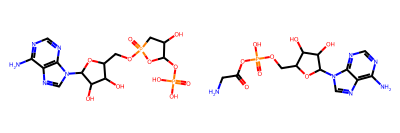

In [295]:
try_pocket('4f1m_A')

5w2g_A
novelty: 0.21138211382113825
qed: 0.34349351797913347
sa: 0.5741149558174669
ds: -6.0


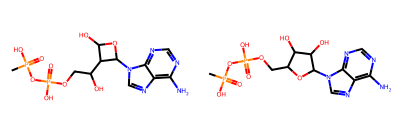

In [278]:
try_pocket('5w2g_A')

In [259]:
from IPython.display import SVG, display

In [282]:
# for p in list(decomp_res.keys()):
#     img = try_pocket(p)
#     if img is not None:
#         display(img)

In [300]:
pdb_id = '4f1m_A'

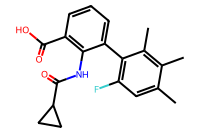

In [310]:
idx_sort = [i for i in np.argsort(pharmaco_res[pdb_id]['novelty'])]
i = 3

pharmaco_mol = Chem.MolFromSmiles(pharmaco_res[pdb_id]['smiles'][idx_sort[i]])

img = Draw.MolToImage(pharmaco_mol, size=(200, 133), thickness=0)
img.save('figures/example_mols/pharmaco_molecule1.png')
img

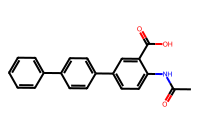

In [311]:
smi = get_most_similar_compound(pharmaco_res[pdb_id]['smiles'][idx_sort[i]])
sim_mol = Chem.MolFromSmiles(smi)
img = Draw.MolToImage(sim_mol, size=(200, 133), thickness=0)
img.save('figures/example_mols/pharmaco_similar_molecule1.png')
img

In [312]:
print(f"novelty: {pharmaco_res['5w2g_A']['novelty'][idx_sort[i]]}")
print(f"qed: {pharmaco_res['5w2g_A']['qeds'][idx_sort[i]]}")
print(f"sa: {pharmaco_res['5w2g_A']['sas'][idx_sort[i]]}")
print(f"ds: {pharmaco_res['5w2g_A']['docking_scores'][idx_sort[i]]}")

novelty: 0.6862745098039216
qed: 0.9196700620414299
sa: 0.7998247238744481
ds: -7.5


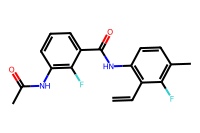

In [292]:
idx_sort = [i for i in np.argsort(pharmaco_res['5w2g_A']['novelty'])]
i = 2

pharmaco_mol = Chem.MolFromSmiles(pharmaco_res['5w2g_A']['smiles'][idx_sort[i]])

img = Draw.MolToImage(pharmaco_mol, size=(200, 133), thickness=0)
img.save('figures/example_mols/pharmaco_molecule1.png')
img

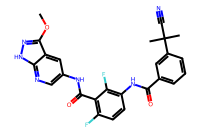

In [293]:
smi = get_most_similar_compound(pharmaco_res['5w2g_A']['smiles'][idx_sort[i]])
sim_mol = Chem.MolFromSmiles(smi)
img = Draw.MolToImage(sim_mol, size=(200, 133), thickness=0)
img.save('figures/example_mols/pharmaco_similar_molecule1.png')
img

In [294]:
print(f"novelty: {pharmaco_res['5w2g_A']['novelty'][idx_sort[i]]}")
print(f"qed: {pharmaco_res['5w2g_A']['qeds'][idx_sort[i]]}")
print(f"sa: {pharmaco_res['5w2g_A']['sas'][idx_sort[i]]}")
print(f"ds: {pharmaco_res['5w2g_A']['docking_scores'][idx_sort[i]]}")

novelty: 0.6304347826086957
qed: 0.8855077046292027
sa: 0.838068965237138
ds: -7.7
